In [68]:
import pandas as pd
import numpy as np
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [69]:
dataset=pd.read_csv(r'C:\Project 3\project4.csv')
dataset.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


In [70]:
dataset_original=dataset.copy()

In [71]:
#dataset.columns
#Index(['Loanapp_ID', 'Sex', 'Marital_Status', 'first_name', 'last_name', 'email', 'address', 'Dependents', 'Qual_var', 'SE', 'App_Income_1', 'App_Income_2', 'CPL_Amount', 'CPL_Term', 'Credit_His', 'Prop_Area', 'INT_ID', 'Prev_ID', 'AGT_ID'], dtype='object')

In [72]:
dataset.dtypes

Loanapp_ID         object
Sex                object
Marital_Status     object
first_name         object
last_name          object
email              object
address            object
Dependents         object
Qual_var           object
SE                 object
App_Income_1      float64
App_Income_2      float64
CPL_Amount        float64
CPL_Term          float64
Credit_His        float64
Prop_Area          object
INT_ID              int64
Prev_ID            object
AGT_ID             object
CPL_Status         object
dtype: object

In [73]:
dataset.shape

(614, 20)

In [74]:
print(dataset.isnull().sum())

Loanapp_ID         0
Sex               13
Marital_Status     3
first_name         0
last_name          0
email              0
address            0
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
INT_ID             0
Prev_ID            0
AGT_ID             0
CPL_Status         0
dtype: int64


In [75]:
print(dataset['Sex'].value_counts())
dataset['Sex'].fillna('M',inplace=True)
print(dataset['Sex'].value_counts())

M    489
F    112
Name: Sex, dtype: int64
M    502
F    112
Name: Sex, dtype: int64


In [76]:
#X= dataset['Marital_Status'].value_counts()
#if X[0]>X[1]:
    #dataset['Marital_Status'].fillna('X[0]',inplace=True)
#else:
   # dataset['Marital_Status'].fillna('X[1]',inplace=True)
#print(dataset['Marital_Status'].value_counts())


In [77]:
#dataset['Sex'].fillna('Y',inplace=True)
#print(dataset['Marital_Status'].value_counts())

In [78]:
print(dataset['Marital_Status'].value_counts())
dataset['Marital_Status'].fillna('Y',inplace=True)
print(dataset['Marital_Status'].value_counts())

Y    398
N    213
Name: Marital_Status, dtype: int64
Y    401
N    213
Name: Marital_Status, dtype: int64


In [79]:
print(dataset['Dependents'].value_counts())
dataset['Dependents'].fillna('0',inplace=True)
print(dataset['Dependents'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [80]:
print(dataset['SE'].value_counts())
dataset['SE'].fillna('N',inplace=True)
print(dataset['SE'].value_counts())

N    500
Y     82
Name: SE, dtype: int64
N    532
Y     82
Name: SE, dtype: int64


In [81]:
print(dataset['CPL_Amount'].value_counts())
median = dataset['CPL_Amount'].median()
dataset['CPL_Amount'].fillna(median, inplace=True)
print(dataset['CPL_Amount'].value_counts())

144.0    20
132.0    17
120.0    15
192.0    13
224.4    12
         ..
56.4      1
588.0     1
196.8     1
780.0     1
273.6     1
Name: CPL_Amount, Length: 219, dtype: int64
144.0    20
132.0    17
120.0    15
192.0    13
153.6    13
         ..
56.4      1
588.0     1
196.8     1
780.0     1
273.6     1
Name: CPL_Amount, Length: 219, dtype: int64


In [82]:
print(dataset['CPL_Term'].value_counts())
median = dataset['CPL_Term'].median()
dataset['CPL_Term'].fillna(median, inplace=True)
print(dataset['CPL_Term'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: CPL_Term, dtype: int64
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: CPL_Term, dtype: int64


In [83]:
print(dataset['Credit_His'].value_counts())
median = dataset['Credit_His'].median()
dataset['Credit_His'].fillna(median, inplace=True)
print(dataset['Credit_His'].value_counts())

1.0    475
0.0     89
Name: Credit_His, dtype: int64
1.0    525
0.0     89
Name: Credit_His, dtype: int64


In [84]:
print(dataset.isnull().sum())

Loanapp_ID        0
Sex               0
Marital_Status    0
first_name        0
last_name         0
email             0
address           0
Dependents        0
Qual_var          0
SE                0
App_Income_1      0
App_Income_2      0
CPL_Amount        0
CPL_Term          0
Credit_His        0
Prop_Area         0
INT_ID            0
Prev_ID           0
AGT_ID            0
CPL_Status        0
dtype: int64


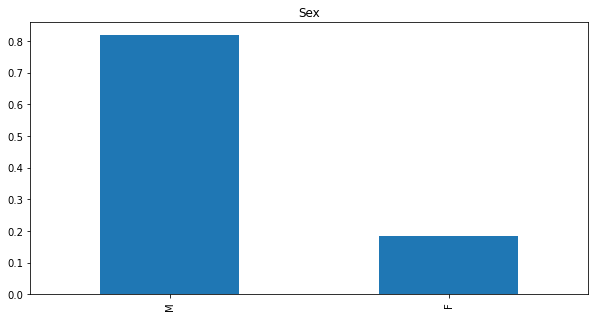

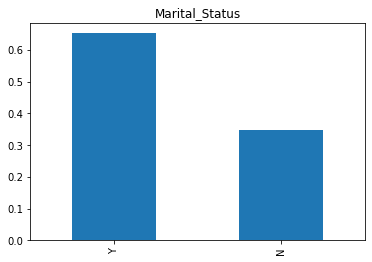

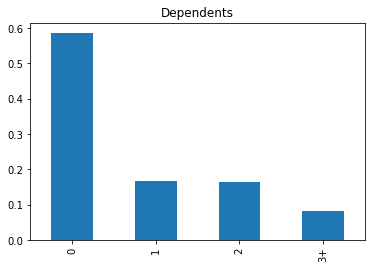

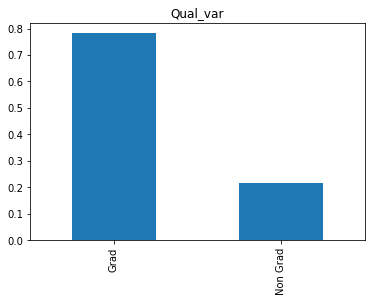

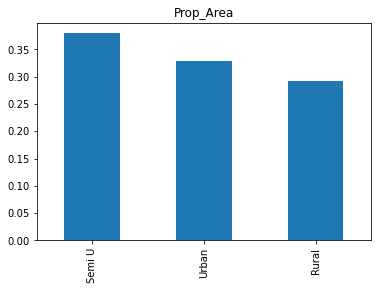

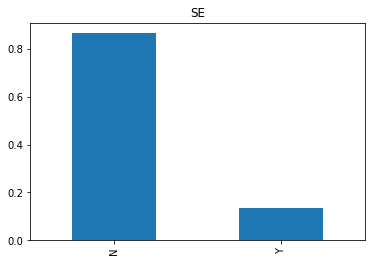

In [85]:
dataset['Sex'].value_counts(normalize=True).plot.bar(figsize=(10,5), title='Sex')
plt.show()
dataset['Marital_Status'].value_counts(normalize=True).plot.bar(title='Marital_Status')
plt.show()
dataset['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()
dataset['Qual_var'].value_counts(normalize=True).plot.bar(title='Qual_var')
plt.show()
dataset['Prop_Area'].value_counts(normalize=True).plot.bar(title='Prop_Area')
plt.show()
dataset['SE'].value_counts(normalize=True).plot.bar(title='SE')
plt.show()


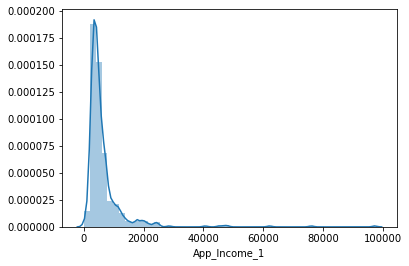

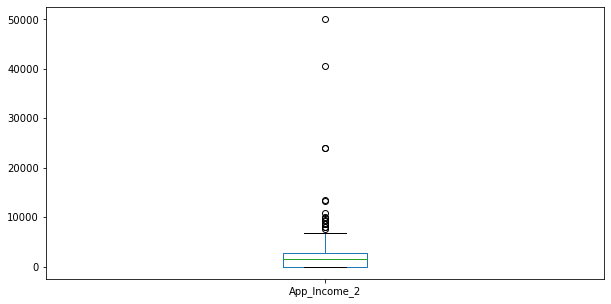

In [86]:
sns.distplot(dataset['App_Income_1'])
plt.show()
dataset['App_Income_2'].plot.box(figsize=(10,5))
plt.show()

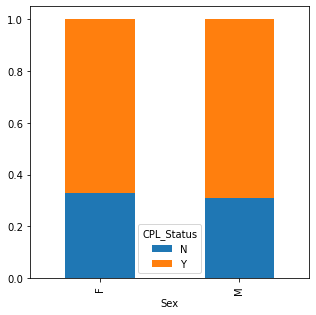

In [87]:
Sex=pd.crosstab(dataset['Sex'],dataset['CPL_Status'])
Sex.div(Sex.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()

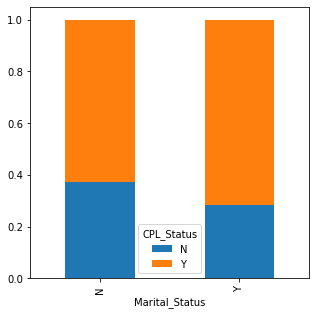

In [88]:
Marital_Status=pd.crosstab(dataset['Marital_Status'],dataset['CPL_Status'])
Marital_Status.div(Marital_Status.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()

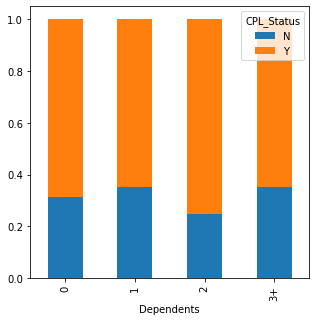

In [89]:
Dependents=pd.crosstab(dataset['Dependents'],dataset['CPL_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()

In [1]:
Qual_var=pd.crosstab(dataset['Qual_var'],dataset['CPL_Status'])
Qual_var.div(Qual_var.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()

NameError: name 'pd' is not defined

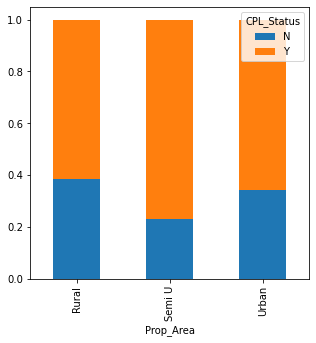

In [91]:
Prop_Area=pd.crosstab(dataset['Prop_Area'],dataset['CPL_Status'])
Prop_Area.div(Prop_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()

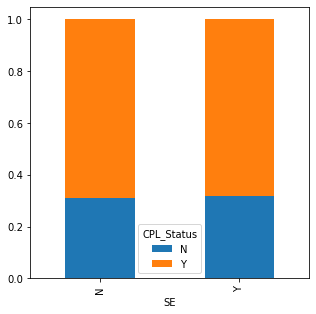

In [92]:
SE=pd.crosstab(dataset['SE'],dataset['CPL_Status'])
SE.div(SE.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.show()

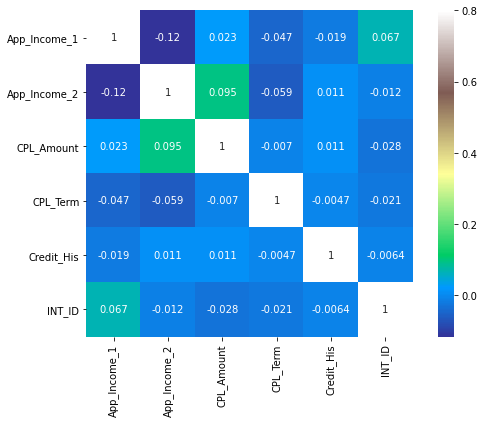

In [93]:
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="terrain", annot = True)

In [117]:
y=dataset[['CPL_Status']]
X=dataset.drop(['Loanapp_ID','first_name','last_name','address'],axis=1)
X = pd.get_dummies(X)
X_train,X_test,y_train,y_test=train_test_split(X,y.values.ravel(),test_size=0.25)

In [118]:
model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression()
pred_cv = model.predict(X_test)
accuracy_score(y_test,pred_cv)

0.6688311688311688

In [119]:
from sklearn.model_selection import StratifiedKFold

In [120]:
i=1
mean = 0
y=y.values.ravel()
kf = StratifiedKFold(n_splits=5,random_state=1)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = LogisticRegression(random_state=1)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))




1 of kfold 5 
accuracy_score 0.6910569105691057

2 of kfold 5 
accuracy_score 0.6910569105691057

3 of kfold 5 
accuracy_score 0.6829268292682927

4 of kfold 5 
accuracy_score 0.6829268292682927

5 of kfold 5 
accuracy_score 0.6885245901639344

 Mean Validation Accuracy 0.6872984139677463


In [98]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(X_test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 1.0

2 of kfold 5 
accuracy_score 1.0

3 of kfold 5 
accuracy_score 1.0

4 of kfold 5 
accuracy_score 1.0

5 of kfold 5 
accuracy_score 1.0

 Mean Validation Accuracy 1.0


In [99]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
 print ('\n{} of kfold {} '.format(i,kf.n_splits))
 xtr,xvl = X.loc[train_index],X.loc[test_index]
 ytr,yvl = y[train_index],y[test_index]
 model = RandomForestClassifier(random_state=1, max_depth=10)
 model.fit(xtr,ytr)
 pred_test=model.predict(xvl)
 score=accuracy_score(yvl,pred_test)
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 1.0

2 of kfold 5 
accuracy_score 1.0

3 of kfold 5 
accuracy_score 1.0

4 of kfold 5 
accuracy_score 1.0

5 of kfold 5 
accuracy_score 1.0

 Mean Validation Accuracy 1.0


In [100]:
from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
 print('\n{} of kfold {}'.format(i,kf.n_splits)) 
 xtr,xvl = X.loc[train_index],X.loc[test_index] 
 ytr,yvl = y[train_index],y[test_index] 
 model = XGBClassifier(n_estimators=50, max_depth=4) 
 model.fit(xtr, ytr) 
 pred_test = model.predict(xvl) 
 score = accuracy_score(yvl,pred_test) 
 mean += score
 print ('accuracy_score',score)
 i+=1
 pred_test = model.predict(X_test)
 pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
[12:47:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 1.0

2 of kfold 5
[12:47:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 1.0

3 of kfold 5
[12:47:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 1.0

4 of kfold 5
[12:47:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binar

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
# print(confusion_matrix(y_test,pred))
# print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

0.7142857142857143


In [102]:
from sklearn import svm
from sklearn.svm import SVC
model = SVC(kernel='rbf')#rbf or linear
model.fit(X_train, y_train)
pred_cv = model.predict(X_test)
print("\n\nSVM - Stratified k-folds cross Validation")
tot_acc = 0
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_indices,test_indices in kf.split(X,y):
    print('\nIteration {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_indices],X.loc[test_indices]     
    ytr,yvl = y[train_indices],y[test_indices]         
    model = SVC(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)     
    i+=1
    tot_acc = tot_acc + score
SVM_mean_acc = tot_acc/5
print("\nMean validation accuracy for SVM - Stratified k-folds cross Validation")
print("SVM   " +str(SVM_mean_acc))



SVM - Stratified k-folds cross Validation

Iteration 1 of kfold 5
accuracy_score 0.6910569105691057

Iteration 2 of kfold 5
accuracy_score 0.6910569105691057

Iteration 3 of kfold 5
accuracy_score 0.6829268292682927

Iteration 4 of kfold 5
accuracy_score 0.6829268292682927

Iteration 5 of kfold 5
accuracy_score 0.6885245901639344

Mean validation accuracy for SVM - Stratified k-folds cross Validation
SVM   0.6872984139677463


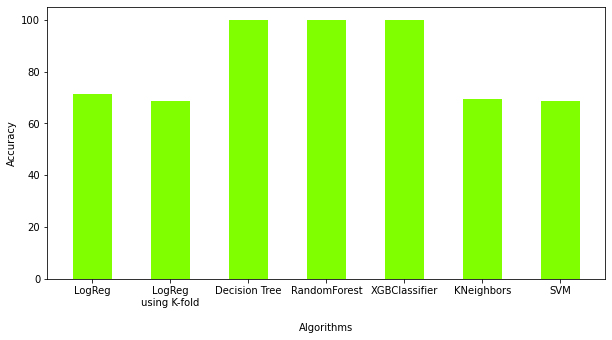

In [146]:
import matplotlib.pyplot as plt

data = {'LogReg': 71.42, 'LogReg\nusing K-fold': 68.72,'Decision Tree':100, 'RandomForest':100, 'XGBClassifier':100, 'KNeighbors':69.48, 'SVM':68.72}
names = list(data.keys())
values = list(data.values())
fig=plt.figure(figsize=(10,5))
plt.bar(names,values,color='Chartreuse',width=0.5)
#plt.bar(range(len(data)), values, tick_label=names)
plt.xlabel('\nAlgorithms')
plt.ylabel('Accuracy')
plt.show()